<img src="https://t3.ftcdn.net/jpg/02/15/55/74/360_F_215557461_4i6XqmzKjHGDoZoIiiCXiZELpYrRZTyT.jpg" alt="Header Image" width="
1000" height="250"/>

# Final Python Project

### Avocado Data Analysis
#### Done By: Team WFM

# © ExploreAI 2024

# ---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** This project focuses on analyzing avocado sales and pricing data to uncover trends and insights. The analysis includes data cleaning, filtering, and exploratory data analysis (EDA). Insights gained from this analysis can help in understanding the avocado market and predicting future trends.

---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* These packages are essential for data manipulation, visualization, and statistical analysis.
---

In [1]:
!pip install -r requirements.txt
!pip install re

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd # Importing the Pandas package with an alias, pd
from sqlalchemy import create_engine, text # Importing the SQL interface. If this fails, run !pip install sqlalchemy in another cell.
import matplotlib.pyplot as plt
import seaborn as sns
import re #this import regex package for Python used in data cleaning

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* The dataset used in this project is sourced from [Kaggle's Avocado Prices dataset](https://www.kaggle.com/neuromusic/avocado-prices). It contains data on avocado prices and sales volume from various regions in the U.S. between 2015 and 2018.
 
* **Data Fields:**
- `Date`: The date of the observation.
- `AveragePrice`: The average price of a single avocado.
- `Total Volume`: The total number of avocados sold.
- `4046`, `4225`, `4770`: Different avocado types based on PLU codes.
- `Region`: The geographical region.
- `Type`: The type of avocado (conventional or organic).
- `Year`: The year of the observation.

In [27]:
#Please use code cells to code in and do not forget to comment your code.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

The data is loaded into a Pandas DataFrame for easy manipulation:

In [2]:
df = pd.read_csv("Avocado_data.csv")
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


This DataFrame will be used for all subsequent analysis.

In [33]:
df.info() # Using this function to provide a concise summary of our data and to check for null entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


In [107]:
df.describe() # Using the describe function to view summary statistics on our data in order to have an overview.

,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags
count,53415.000000,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,5.341500e+04,4.102500e+04,4.102500e+04,41025.000000
mean,1.428910,8.694474e+05,2.982707e+05,2.222170e+05,2.053195e+04,2.175083e+05,1.039222e+05,2.331316e+04,2731.811796
std,0.393116,3.545274e+06,1.307669e+06,9.554624e+05,1.040977e+05,8.676947e+05,5.692608e+05,1.496622e+05,22589.096454
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.119091,1.626465e+04,6.947250e+02,2.120800e+03,0.000000e+00,7.846520e+03,0.000000e+00,0.000000e+00,0.000000
50%,1.400000,1.203525e+05,1.458058e+04,1.751663e+04,9.005000e+01,3.695310e+04,6.945800e+02,0.000000e+00,0.000000
75%,1.690000,4.542380e+05,1.287924e+05,9.351560e+04,3.599735e+03,1.110146e+05,3.795298e+04,2.814920e+03,0.000000
max,3.440830,6.103446e+07,2.544720e+07,2.047057e+07,2.860025e+06,1.629830e+07,1.256716e+07,4.324231e+06,679586.800000


In [7]:
#Please use code cells to code in and do not forget to comment your code.


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* Data cleaning includes handling missing values, filtering irrelevant data, and creating new features if necessary:
---

In [6]:
#Please use code cells to code in and do not forget to comment your code.
''' This code will take the headings from dataframe and convert them into PEP 8 compliant headings and then replace the dataframe headings'''

def pep8_compliant_column_names(df):
    """
    Convert DataFrame column names to PEP 8 compliant names.
    
    Parameters:
    df (pd.DataFrame): The DataFrame with column names to convert.
    
    Returns:
    pd.DataFrame: DataFrame with updated column names.
    """
    def convert_to_pep8(name):
        # Replace spaces with underscores
        name = re.sub(r'\s+', '_', name)
        # Insert underscores between adjacent capitalized words
        name = re.sub(r'(?<=[a-z])(?=[A-Z])', '_', name)
        # Convert to lowercase
        name = name.lower()
        # Remove any non-alphanumeric characters except underscores
        name = re.sub(r'[^\w_]', '', name)
        # Replace multiple underscores with a single underscore
        name = re.sub(r'_+', '_', name)
        return name

    # Apply PEP 8 compliance to each column name
    new_columns = [convert_to_pep8(col) for col in df.columns]
    
    # Set the new column names
    df.columns = new_columns
    
    return df

In [10]:
df = pep8_compliant_column_names(df)
print(df.head())

         date  average_price  total_volume    plu4046    plu4225   plu4770  \
0  2015-01-04           1.22      40873.28    2819.50   28287.42     49.90   
1  2015-01-04           1.79       1373.95      57.42     153.88      0.00   
2  2015-01-04           1.00     435021.49  364302.39   23821.16     82.15   
3  2015-01-04           1.76       3846.69    1500.15     938.35      0.00   
4  2015-01-04           1.08     788025.06   53987.31  552906.04  39995.03   

   total_bags  small_bags  large_bags  xlarge_bags          type  \
0     9716.46     9186.93      529.53          0.0  conventional   
1     1162.65     1162.65        0.00          0.0       organic   
2    46815.79    16707.15    30108.64          0.0  conventional   
3     1408.19     1071.35      336.84          0.0       organic   
4   141136.68   137146.07     3990.61          0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta

In [110]:
df.isnull().sum # Checking for missing values

<bound method DataFrame.sum of         date  average_price  total_volume  plu4046  plu4225  plu4770  \
0      False          False         False    False    False    False   
1      False          False         False    False    False    False   
2      False          False         False    False    False    False   
3      False          False         False    False    False    False   
4      False          False         False    False    False    False   
...      ...            ...           ...      ...      ...      ...   
53410  False          False         False    False    False    False   
53411  False          False         False    False    False    False   
53412  False          False         False    False    False    False   
53413  False          False         False    False    False    False   
53414  False          False         False    False    False    False   

       total_bags  small_bags  large_bags  xlarge_bags   type  region  
0           False       False   

In [111]:
df['region'].unique() # Using the unique method to find distinct values in the regions column

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'Miami', 'Midsouth',
       'Nashville', 'NewOrleans', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego',
       'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral',
       'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS',
       'West', 'WestTexNewMexico', 'BirminghamMontgomery',
       'PeoriaSpringfield', 'Providence', 'Toledo', 'Wichita',
       'MiamiFtLauderdale'], dtype=object)

In [112]:
df['region'].value_counts() # Using the value_counts method to find the frequency of each unique value in the region column 

region
Albany                  932
Atlanta                 932
BaltimoreWashington     932
Boise                   932
Boston                  932
BuffaloRochester        932
California              932
Charlotte               932
Chicago                 932
CincinnatiDayton        932
Columbus                932
DallasFtWorth           932
Denver                  932
Detroit                 932
GrandRapids             932
GreatLakes              932
HarrisburgScranton      932
HartfordSpringfield     932
Houston                 932
Indianapolis            932
Jacksonville            932
LasVegas                932
LosAngeles              932
Louisville              932
Midsouth                932
Nashville               932
NewOrleans              932
NewYork                 932
SouthCarolina           932
Northeast               932
NorthernNewEngland      932
Orlando                 932
Philadelphia            932
PhoenixTucson           932
Pittsburgh              932
Plains       

In [115]:
df.groupby('region').count() # Grouping by the region column and counting the values in each column to look for any anomalies

,date,average_price,total_volume,plu4046,plu4225,plu4770,total_bags,small_bags,large_bags,xlarge_bags,type
region,,,,,,,,,,,
Albany,932,932,932,932,932,932,932,722,722,722,932
Atlanta,932,932,932,932,932,932,932,722,722,722,932
BaltimoreWashington,932,932,932,932,932,932,932,722,722,722,932
BirminghamMontgomery,618,618,618,618,618,618,618,408,408,408,618
Boise,932,932,932,932,932,932,932,722,722,722,932
Boston,932,932,932,932,932,932,932,722,722,722,932
BuffaloRochester,932,932,932,932,932,932,932,722,722,722,932
California,932,932,932,932,932,932,932,722,722,722,932
Charlotte,932,932,932,932,932,932,932,722,722,722,932


In [114]:
df_filtered = df[df['region'] == 'California'] # Filtering data for specific types of analysis
df_filtered

,date,average_price,total_volume,plu4046,plu4225,plu4770,total_bags,small_bags,large_bags,xlarge_bags,type,region
12,2015-01-04,0.930000,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,California
13,2015-01-04,1.240000,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,California
120,2015-01-11,0.920000,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,California
121,2015-01-11,1.100000,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.00,organic,California
228,2015-01-18,1.020000,5570915.26,2780859.66,2108450.36,121614.31,559990.93,520299.26,36501.18,3190.49,conventional,California
...,...,...,...,...,...,...,...,...,...,...,...,...
53127,2023-11-19,1.727136,271097.77,120937.09,8513.68,0.00,129489.38,NaN,NaN,NaN,organic,California
53186,2023-11-26,1.304916,4200357.00,2391331.83,470082.13,373369.38,834081.63,NaN,NaN,NaN,conventional,California
53245,2023-11-26,1.734881,268456.70,115377.24,7771.02,0.00,135478.19,NaN,NaN,NaN,organic,California
53304,2023-12-03,1.066007,5845932.70,3868487.00,591584.26,340737.02,916388.81,NaN,NaN,NaN,conventional,California


This step ensures the dataset is clean and ready for analysis.

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* The EDA involves visualizing trends, distribution, and correlations within the dataset.
---


- **Price Trends Over Time:**

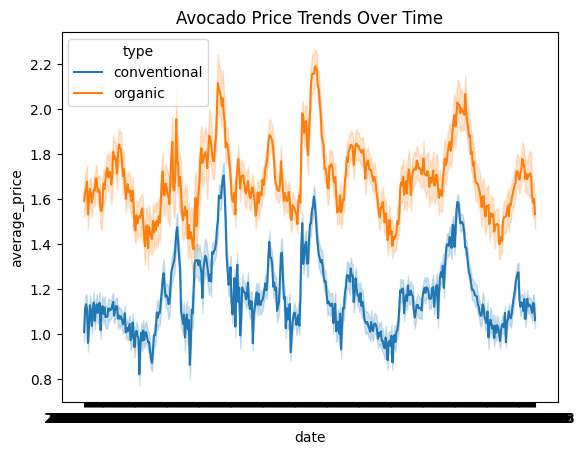

In [12]:
    sns.lineplot(data=df, x='date', y='average_price', hue='type')
    plt.title('Avocado Price Trends Over Time')
    plt.show()

- **Regional Analysis:**

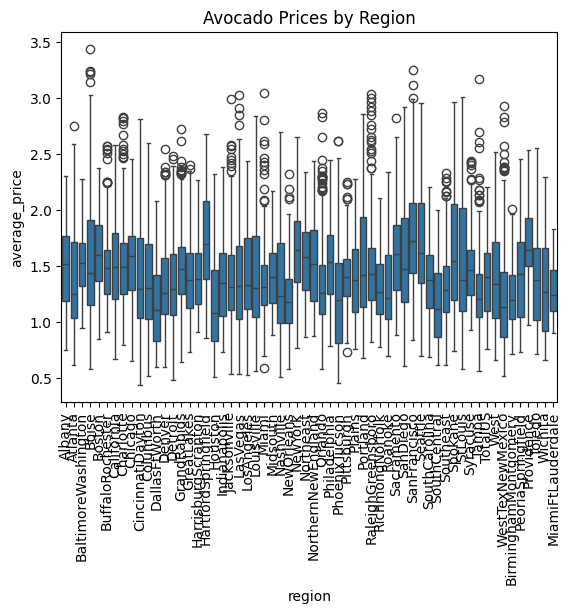

In [13]:
    sns.boxplot(data=df, x='region', y='average_price')
    plt.xticks(rotation=90)
    plt.title('Avocado Prices by Region')
    plt.show()

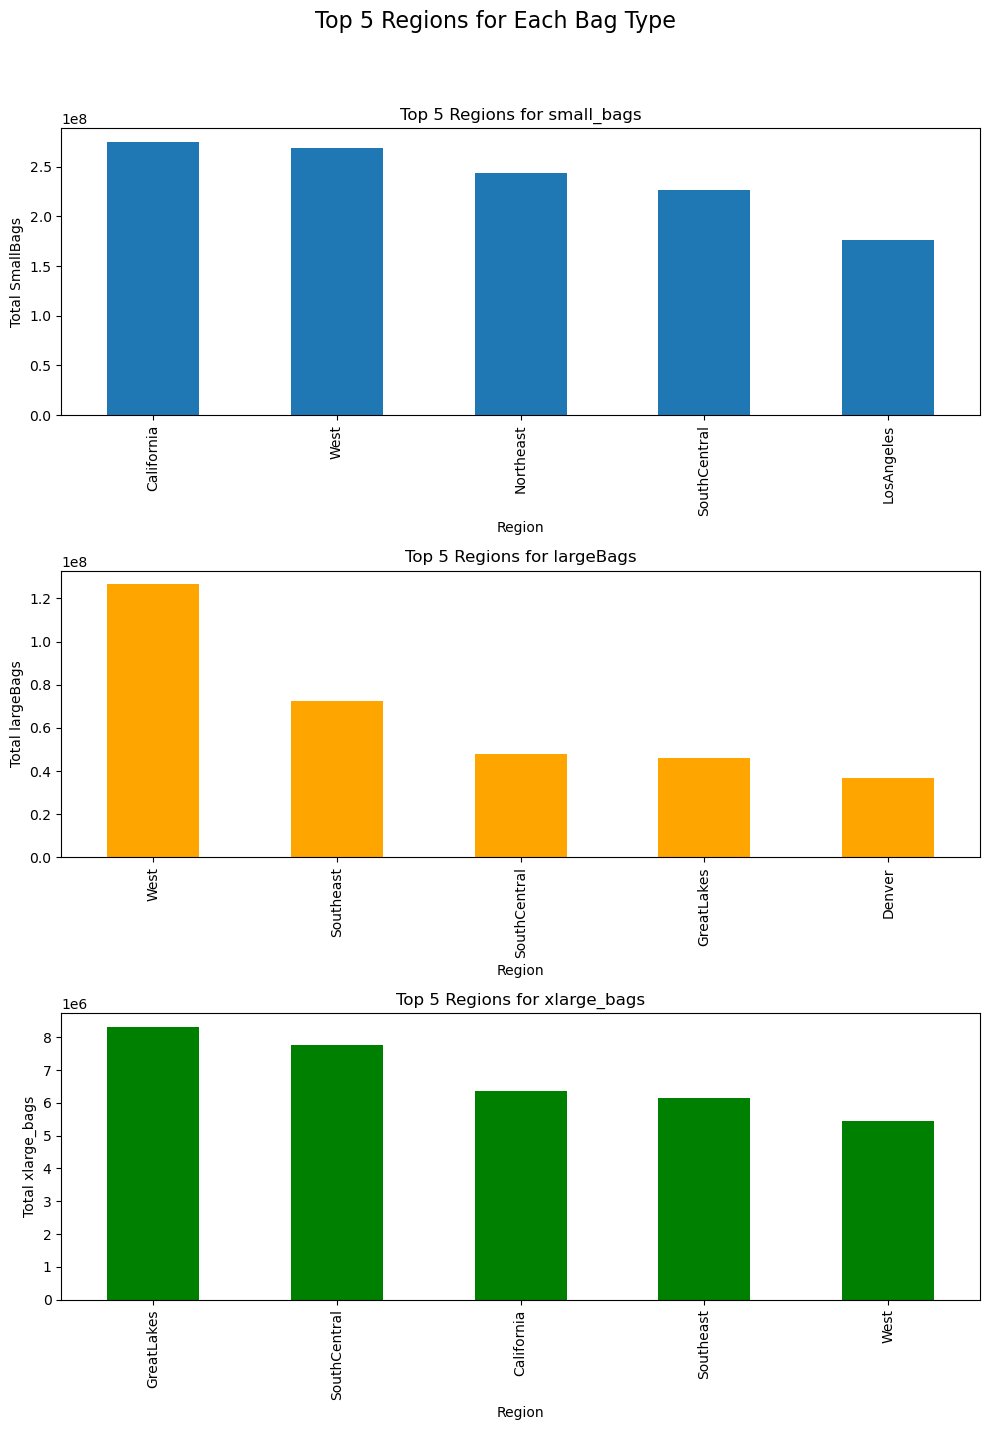

In [12]:

# Exclude 'TotalUS' region if it exists
df_filtered = df[df['region'] != 'TotalUS']

# Group by region and sum the values
grouped_df = df_filtered.groupby('region')[['small_bags', 'large_bags', 'xlarge_bags']].sum()

# Function to get top 5 regions for each bag type
def top_5_regions_by_bag_type(grouped_df):
    top_5_dict = {}
    
    for bag_type in grouped_df.columns:
        # Sort regions by summed values in descending order and get the top 5
        top_5 = grouped_df[[bag_type]].sort_values(by=bag_type, ascending=False).head(5)
        top_5_dict[bag_type] = top_5
    
    return top_5_dict

# Get top 5 regions for each bag type
top_5_per_bag_type = top_5_regions_by_bag_type(grouped_df)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
fig.suptitle('Top 5 Regions for Each Bag Type', fontsize=16)

# SmallBags
top_5_per_bag_type['small_bags'].plot(kind='bar', ax=axes[0], legend=False)
axes[0].set_title('Top 5 Regions for small_bags')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Total SmallBags')

# LargeBags
top_5_per_bag_type['large_bags'].plot(kind='bar', ax=axes[1], legend=False, color='orange')
axes[1].set_title('Top 5 Regions for largeBags')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Total largeBags')

# XLargeBags
top_5_per_bag_type['xlarge_bags'].plot(kind='bar', ax=axes[2], legend=False, color='green')
axes[2].set_title('Top 5 Regions for xlarge_bags')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Total xlarge_bags')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


- **Distribution of bag sizes:**

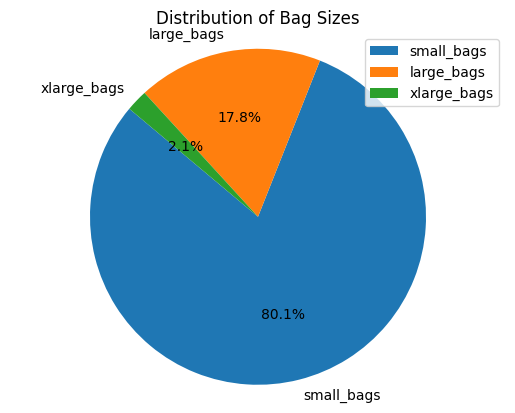

In [15]:
df_filtered = df[df['region'] != 'TotalUS']  #Filter out TotalUS region
bag_sizes = df_filtered[['small_bags', 'large_bags', 'xlarge_bags']].sum()  #sum the values per bag size
labels = bag_sizes.index  #prepare data for pie chart 
sizes = bag_sizes.values
#create pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140) 
plt.legend(loc="best")
plt.axis('equal')
plt.title('Distribution of Bag Sizes')
plt.show()

- **Correlation Matrix:**

A correlation matrix is useful to understand relationships between numerical variables in the dataset.

              AveragePrice  TotalVolume   plu4046   plu4225   plu4770  \
AveragePrice      1.000000    -0.179153 -0.184299 -0.155367 -0.143928   
TotalVolume      -0.179153     1.000000  0.966413  0.930966  0.817264   
plu4046          -0.184299     0.966413  1.000000  0.880644  0.828545   
plu4225          -0.155367     0.930966  0.880644  1.000000  0.803806   
plu4770          -0.143928     0.817264  0.828545  0.803806  1.000000   
TotalBags        -0.166318     0.965620  0.920839  0.893413  0.775465   
SmallBags        -0.137005     0.707320  0.673314  0.714187  0.639742   
LargeBags        -0.127858     0.587231  0.590021  0.650030  0.585541   
XLargeBags       -0.103314     0.540959  0.475127  0.446047  0.429754   

              TotalBags  SmallBags  LargeBags  XLargeBags  
AveragePrice  -0.166318  -0.137005  -0.127858   -0.103314  
TotalVolume    0.965620   0.707320   0.587231    0.540959  
plu4046        0.920839   0.673314   0.590021    0.475127  
plu4225        0.893413   0.7

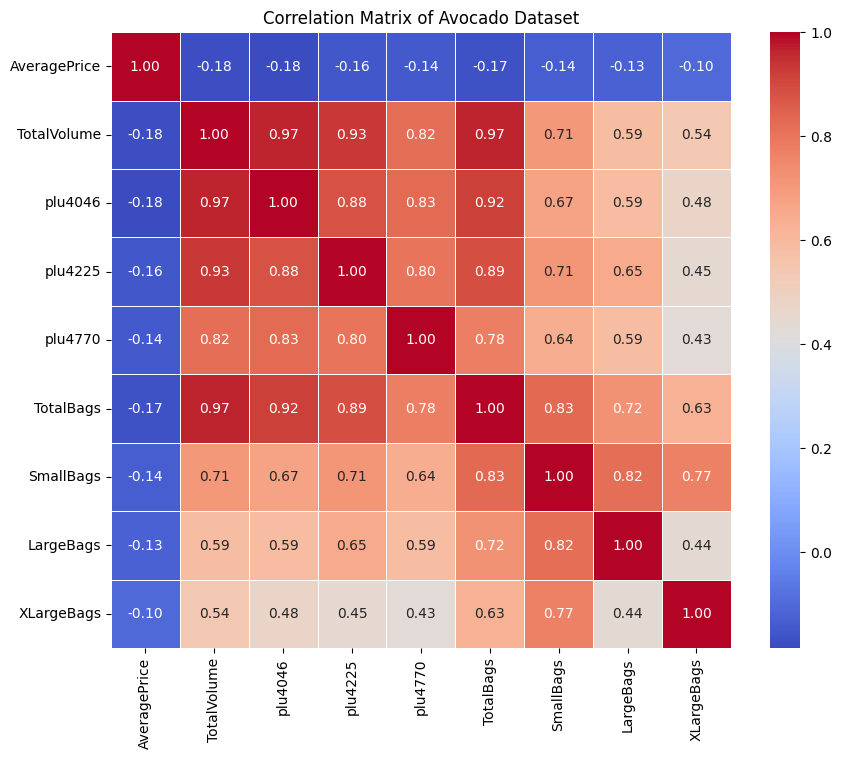

In [13]:
numeric_df = df.select_dtypes(include=[float, int]) #filter out non-numeric data types
correlation_matrix = numeric_df.corr() #create correlation matrix
print(correlation_matrix) #print correlation matrix
#create correlation matrix visualization
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Avocado Dataset')
plt.show()


In [3]:
paragraph = """Findings from the visualisations: 
Avocado price trends organic over the time period is on average almost double the price trends for conventional.
There are similar seasonal behaviours of price trends on certain months where the avocado prices goes up and down, possibly due to seasonal production.
Avocado prices per region have a general tendency to be centred around 1,5 where certain regions have highs of 2.0 and lows of 1.0
The west region seems very popular with small to large bags where the regions
of the great lakes and south central are very popular with extra large bags.
This could be associated to the less price variability in great lakes versus a greater price variability in west region,
where less volatility in price will produce bigger purchases.
80,1% of the economy favours small bag purchases of avocados which means that they mostly do not buy in bulk but prefer to purchase on consumption.
The total volume of avocados has the strongest corelation with small bags, followed by large bags and extra large bags.
Total bags to total volume of avocados has a very strong correlation which could mean that there are always adequate supply
of bags to the volume of avocados purchased  """
             

# Print the paragraph
print(paragraph)

Findings from the visualisations: 
Avocado price trends organic over the time period is on average almost double the price trends for conventional.
There are similar seasonal behaviours of price trends on certain months where the avocado prices goes up and down, possibly due to seasonal production.
Avocado prices per region have a general tendency to be centred around 1,5 where certain regions have highs of 2.0 and lows of 1.0
The west region seems very popular with small to large bags where the regions
of the great lakes and south central are very popular with extra large bags.
This could be associated to the less price variability in great lakes versus a greater price variability in west region,
where less volatility in price will produce bigger purchases.
80,1% of the economy favours small bag purchases of avocados which means that they mostly do not buy in bulk but prefer to purchase on consumption.
The total volume of avocados has the strongest corelation with small bags, followed

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* In this analysis, we have explored avocado price trends across different regions and over time. Future work could include building predictive models for avocado pricing, further analyzing the impact of seasonality, and expanding the dataset with more recent data to improve forecasting accuracy.
---


In [3]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

- Kaggle Avocado Prices Dataset: [https://www.kaggle.com/neuromusic/avocado-prices](https://www.kaggle.com/neuromusic/avocado-prices)
- Pandas Documentation: [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)
- Seaborn Documentation: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

---

In [15]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
* Raeesa Sukhnanan
* Gary Munn
* Grant Johansen
* Damien Crossland
* Ruben Juries
* Ryno O'Connor